## Kinematics

As an example of the theory developed so far we show how vector addition and matrix multiplication provide a natural language for describing the position of robot arms. To fix ideas we consider the arm, in Figure \ref{fig:2link}, with two links and two joints.

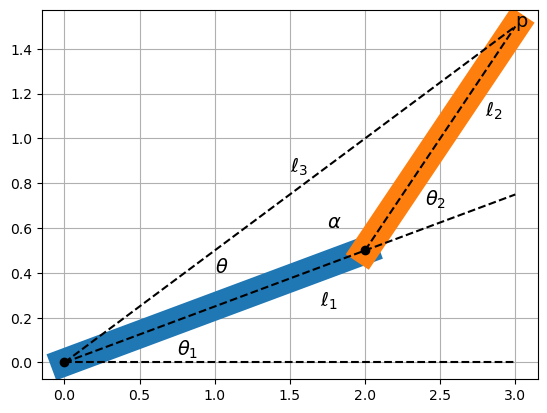

In [1]:
# 2-link robot arm
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot([0,2],[0, 1/2],linewidth=20)
plt.plot(0,0,'ko')
plt.plot([2,3],[1/2,1.5],linewidth=20)
plt.plot(2,1/2,'ko')
plt.plot([0,3],[0,3/4],'k--')
plt.plot([2,3],[1/2,1.5],'k--')
plt.text(.75,.03,'$\\theta_1$', fontsize=14)
plt.plot([0,3],[0,0],'k--')
plt.text(1.7,.25,'$\ell_1$', fontsize=14)
plt.text(2.4,.7,'$\\theta_2$', fontsize=14)
plt.text(2.8,1.1,'$\ell_2$', fontsize=14)
plt.text(1.5,0.85,'$\ell_3$', fontsize=14)
plt.text(3,3/2,'p', fontsize = 14)
plt.plot([0,3],[0,3/2],'k--')
plt.text(1,.4,'$\\theta$', fontsize=14)
plt.text(1.75,.6,'$\\alpha$', fontsize=14)
plt.grid('on')
plt.show();

\begin{myfig}\label{fig:2link} A robot arm with two links, of lengths $\ell_1$ and $\ell_2$. The first link makes the angle $\theta_1$ with the positive x-axis. The second link makes the angle $\theta_2$ with the axis of the first link.\end{myfig}

### Forward Kinematics

Our initial goal is to express the position, $p$, of the end of the second link in terms of the link lengths and joint angles.

Working back from $p$ to the first joint, we specify the undeformed positions

\begin{equation*}
  p_1 = \begin{bmatrix} \ell_1 \\ 0 \end{bmatrix} \and
  p_2 = \begin{bmatrix} \ell_2 \\ 0 \end{bmatrix}.
\end{equation*}

We first rotate the second link from its **undeformed position** and translate it by the length of the first link and arrive at the intermediate position

\begin{equation*}
  q = p_1 + K(\theta_2)p_2, \where K(\theta) = \begin{pmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{pmatrix}
\end{equation*}

We then rotate the first link and achieve the final position

\begin{equation*}
  p = K(\theta_1)q = K(\theta_1)(p_1 + K(\theta_2)p_2) = K(\theta_1)p_1 + K(\theta_1 + \theta_2)p_2
\end{equation*}

We implement this result in the widget below. Please explore!

In [2]:
# 2-link robot arm widget

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

plt.ioff()

ell1 = 3
ell2 = 2
theta1 = 0
theta2 = 0
fig = plt.figure(' ')
link1, = plt.plot([0,ell1*np.cos(theta1)],[0, ell1*np.sin(theta1)], linewidth=10)
K1 = np.array([[np.cos(theta1), -np.sin(theta1)], [np.sin(theta1), np.cos(theta1)]])
p1 = np.array([ell1, 0])
K2 = np.array([[np.cos(theta1+theta2), -np.sin(theta1+theta2)], [np.sin(theta1+theta2), np.cos(theta1+theta2)]])
p2 = np.array([ell2, 0])
p = K1@p1 + K2@p2
link2, = plt.plot([ell1*np.cos(theta1), p[0]],[ell1*np.sin(theta1), p[1]], linewidth=10)

ellTot = ell1 + ell2 + 1
plt.axis([-ellTot,ellTot,-ellTot,ellTot])
plt.grid('on')

theta1S = widgets.FloatSlider(min=0, max=6.4, step=0.1, value=0, description='$\\theta_1$') 
theta2S = widgets.FloatSlider(min=0, max=6.4, step=0.1, value=0, description='$\\theta_2$')

def update( theta1=theta1S, theta2=theta2S ):
    link1.set_data([0,ell1*np.cos(theta1)],[0, ell1*np.sin(theta1)])
    K1 = np.array([[np.cos(theta1), -np.sin(theta1)], [np.sin(theta1), np.cos(theta1)]])
    K2 = np.array([[np.cos(theta1+theta2), -np.sin(theta1+theta2)], [np.sin(theta1+theta2), np.cos(theta1+theta2)]])
    p = K1@p1 + K2@p2
    link2.set_data([ell1*np.cos(theta1), p[0]],[ell1*np.sin(theta1), p[1]])
    fig.canvas.draw_idle()

widgets.interactive(update)

layoutS = widgets.Layout(display='flex', flex_flow='column', justify_content='center')

controls = widgets.VBox([theta1S, theta2S], layout = layoutS)

widgets.HBox([fig.canvas, controls])

\begin{myfig} \label{fig:robo2w} A two-armed, two-slidered robot widget.\end{myfig}

### Inverse Kinematics

\begin{exercise}\label{ex:InvKin2}
The more common problem in robotics is to be given a target location and to produce the joint angles that get you there. With regard to Figure \ref{fig:2link}, let $q$ denote the position of joint connecting the two links.

(a) From the physical constraints; $\|q\|=\ell_1$, $\|p-q\|=\ell_2$, and $\|p\|=\ell_3$ deduce that

\begin{equation*}
  q^Tp = \frac{\ell_3^2+\ell_1^2-\ell_2^2}{2}
\end{equation*}

(b) Deduce from (a) and the representation, $q^Tp=\|q\|\|p\|\cos(\theta)$, achieved in our [Vector Orientation](1.1.VectorOrientation.ipynb) notebook, that

\begin{equation*}
  \cos(\theta) = \frac{\ell_3^2+\ell_1^2-\ell_2^2}{2\ell_1\ell_3}
\end{equation*}

(c) Explain why (b) can be solved for $\theta$ only when $\ell_2\ge|\ell_1-\ell_3|$. What does this inequality say about the physically reachable targets?

(d) Argue that the equation in (b) also follows directly from the Law of Cosines.

(e) With $\theta$ in hand now solve for the two joint angles, $\theta_1$ (using $\angle p$) and $\theta_2$ (using the Law of Cosines), as defined in figure \ref{fig:2link}.
\end{exercise}

Your solution here.

Please check your answer to this last exercise against the animation produced in the cell below.

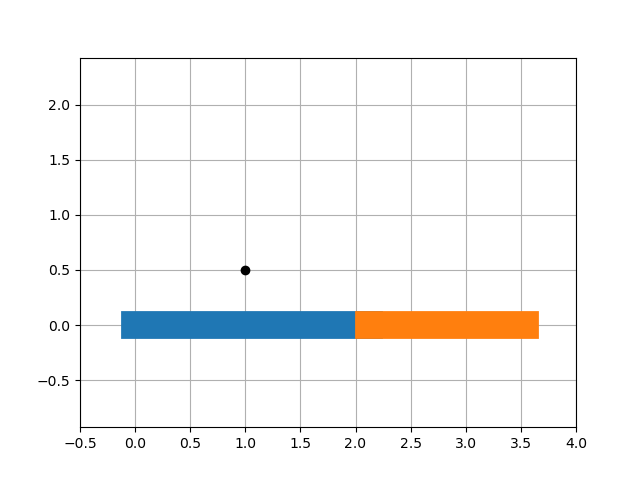

In [3]:
# 2-link robot arm Inverse Kinematics animation

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def update_links(num, data1, data2, link1, link2):
    if (num<20):   # bend at 1st joint for first 20 frames
        link1.set_data([0, data1[0,num]],[0, data1[1,num]])
        link2.set_data([data1[0,num], data2[0,num]],[data1[1,num], data2[1,num]])  # tied to link 1
    else:   # bend at 2nd joint for 2nd 20 frames
        link1.set_data([0, data1[0,19]],[0, data1[1,19]])  # frozen
        link2.set_data([data1[0,19], data2[0,num]],[data1[1,19], data2[1,num]])
    return link1, link2

fig1 = plt.figure(' ')

ell1 = np.sqrt(4.5)
link1, = plt.plot([0, ell1],[0,0],linewidth=20)   # starting position of link1
ell2 = np.sqrt(2)
link2, = plt.plot([ell1, ell1+ell2],[0,0],linewidth=20)   # starting position of link2
plt.grid('on')
plt.axis('equal')
plt.xlim(-0.5,4)
plt.ylim(-0.5,2)

p = np.array([1,1/2])                      # desired end position
plt.plot(p[0], p[1], 'ko')
ell3 = np.sqrt(p[0]**2+p[1]**2)
angp = np.arctan(p[1]/p[0])

theta = np.arccos((ell1**2+ell3**2-ell2**2)/(2*ell1*ell3))

theta1 = angp - theta

alpha = np.arccos((ell1**2+ell2**2-ell3**2)/(2*ell1*ell2))

theta2 = np.pi - alpha

t1 = np.linspace(0,theta1,20)       # intermediate angles
xdata1, ydata1 = ell1*np.cos(t1), ell1*np.sin(t1)
data1 = np.array([xdata1, ydata1])
xdata2, ydata2 = xdata1 + ell2*np.cos(t1), ydata1 + ell2*np.sin(t1)
data2 = np.array([xdata2, ydata2])

t2 = np.linspace(theta1,theta1+theta2,20)       # intermediate angles
xdata22, ydata22 = xdata1[-1]+ell2*np.cos(t2), ydata1[-1]+ell2*np.sin(t2)
data2 = np.append(data2, [xdata22, ydata22], axis=1)

ani = animation.FuncAnimation(fig1, update_links, 41, fargs=(data1, data2, link1, link2), interval=200, repeat=False);

\begin{myfig}\label{fig:InvKin2} Animation of the path from rest to target. \end{myfig}

For an interactive 3-arm challenge check out this [scratch game](https://scratch.mit.edu/projects/10607750).

\begin{exercise}\label{ex:robo2x}
In the animation above we selected, based on Figure \ref{fig:2link}, the "elbow down" configuration. Please edit it to select the elbow up configuration.
\end{exercise}

In [4]:
# Your solution here

The animation above moves one joint at a time in order to reflect the sequence in which $\theta_1$ and $\theta_2$ are computed in Exercise \ref{ex:InvKin2}. In reality robots rarely move in such awkward ways. The code below uses the same procedure to move in a straight line from start to stop points.

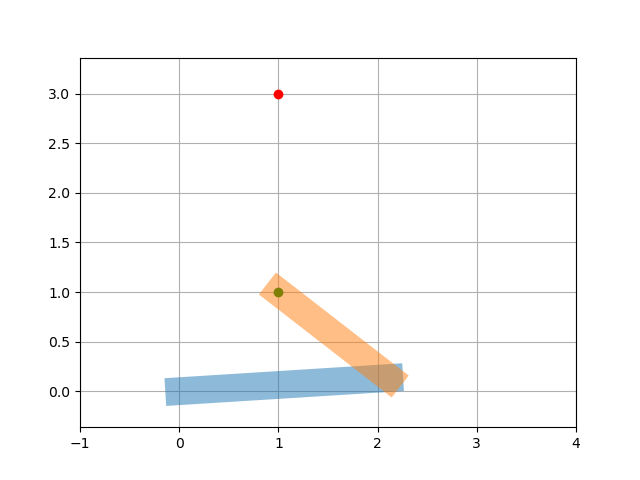

In [5]:
# 2-link robot arm Inverse Kinematics animation between 2 specified points,
# along a straight line

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def update_links(num, theta1, theta2, link1, link2):
    link1.set_data([0, ell1*np.cos(theta1[num])],[0,ell1*np.sin(theta1[num])])
    link2.set_data([ell1*np.cos(theta1[num]), ell1*np.cos(theta1[num])+ell2*np.cos(theta1[num]+theta2[num])],
                   [ell1*np.sin(theta1[num]), ell1*np.sin(theta1[num])+ell2*np.sin(theta1[num]+theta2[num])])  # tied to link 1
    return link1, link2

fig1 = plt.figure(' ')

ell1 = np.sqrt(4.5)
ell2 = np.sqrt(2)

pstart = np.array([1,1])
plt.plot(pstart[0], pstart[1], 'go')
pstop = np.array([1,3])
plt.plot(pstop[0], pstop[1], 'ro')
N = 50   # number of frames in animation
t = np.linspace(0,1,N)
theta1 = np.zeros(N,)
theta2 = np.zeros(N,)

for n in range(N):
    
    p = (1-t[n])*pstart + t[n]*pstop                    
    ell3 = np.sqrt(p[0]**2+p[1]**2)
    angp = np.arctan(p[1]/p[0])
    theta = np.arccos((ell1**2+ell3**2-ell2**2)/(2*ell1*ell3))
    theta1[n] = angp - theta
    alpha = np.arccos((ell1**2+ell2**2-ell3**2)/(2*ell1*ell2))
    theta2[n] = np.pi - alpha

link1, = plt.plot([0, ell1*np.cos(theta1[0])],
                  [0, ell1*np.sin(theta1[0])],linewidth=20,alpha=0.5)   
link2, = plt.plot([ell1*np.cos(theta1[0]), ell1*np.cos(theta1[0])+ell2*np.cos(theta1[0]+theta2[0])],
                  [ell1*np.sin(theta1[0]), ell1*np.sin(theta1[0])+ell2*np.sin(theta1[0]+theta2[0])],
                  linewidth=20,alpha=0.5)  
plt.grid('on')
plt.axis('equal')
plt.xlim(-1,4)
plt.ylim(-1,4)

ani = animation.FuncAnimation(fig1, update_links, N+1, fargs=(theta1, theta2, link1, link2), interval=100, repeat=False)

plt.show();

\begin{myfig}\label{fig:RoboLine} Animation of the straight line trajectory between specified start and stop points. Please observe the (apparent) similtaneous motion of both joints.\end{myfig}

### The Peaucellier-Lipkin linkage

We now move from reaching a particular target to achieving a desired motion. The classic problem is to transform linear motion (of say, a piston) to rotational motion (of say, an axle). We begin this exploration with the lovely motion in Figure \ref{fig:PL0}.

In [6]:
# illustrate the PL lemma
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

R = 1
k = 5

plt.ioff()
fig = plt.figure(' ')

# draw the circle traced by p
ang = np.linspace(-np.pi/2, np.pi/2, 100)
plt.plot(2*R*np.cos(ang)**2, 2*R*np.cos(ang)*np.sin(ang),'b--')

# draw the line traced by q
plt.plot([k/(2*R),k/(2*R)],[-2,2], 'r--')

# construct the base case objects and view
theta = 0
p = np.array([2*R, 0])
plink, = plt.plot([0,p[0]],[0, p[1]], 'b', linewidth=4)
q = np.array([(k/(2*R)), (k/(2*R))*np.tan(theta)])
qlink, = plt.plot([0,q[0]],[0, q[1]], 'r', linewidth=2)
plt.axis('equal')
plt.grid('on')

thetaS = widgets.FloatSlider(min=-np.pi/2, max=np.pi/2, step=0.1, value=0, description='$\\theta$', orientation='vertical') 

def update( theta=thetaS ): 
    
    p = np.array([2*R*np.cos(theta)**2, 2*R*np.cos(theta)*np.sin(theta)])
    plink.set_data([0,p[0]],[0, p[1]])
    
    q = np.array([(k/(2*R)), (k/(2*R))*np.tan(theta)])
    qlink.set_data([0,q[0]],[0, q[1]])
     
    fig.canvas.draw_idle()

widgets.interactive(update)
layoutS = widgets.Layout(display='flex', flex_flow='column', justify_content='center')
controls = widgets.VBox([thetaS], layout = layoutS)
widgets.HBox([fig.canvas, controls])

\begin{myfig}\label{fig:PL0} As $p$ traverses the blue circle (via the $\theta$ slider) we observe that $q$ traverses the red line.\end{myfig}

\begin{exercise}\label{ex:PL0} With reference to Figure \ref{fig:PL0}, if $p$ and $q$ are colinear and $\Vert p\Vert \Vert q\Vert =k$ then as $p$ traverses a circle through $0$ then $q$ traverses a vertical line.

(a) Show that $p(\theta)\equiv (2R\cos^2(\theta),2R\sin(\theta)\cos(\theta))$ describes a circle of radius $R$ centered at $c\equiv(R,0)$ as $\theta$ moves from $-\pi/2$ to $\pi/2$. Hint: Show that $\|p(\theta)-c\|=R$.

(b) Show that if $q(\theta)=\la p(\theta)$ and $\|p(\theta)\|\|q(\theta)\|=k$ then $\la =k/\|p\|^2$.

(c) Show that if $q(\theta)=kp(\theta)/\|p\|^2$ then $q(\theta)=(k/(2R),\ k\tan(\theta)/(2R))$ traverses a vertical line as $p(\theta)$ traverses the circle.

\end{exercise}

Your solution here.

This construction transforms circles to lines (and *vice versa*) with links that change their length with angle. To accomplish this with links of fixed length we introduce the intermediate parallelogram below.

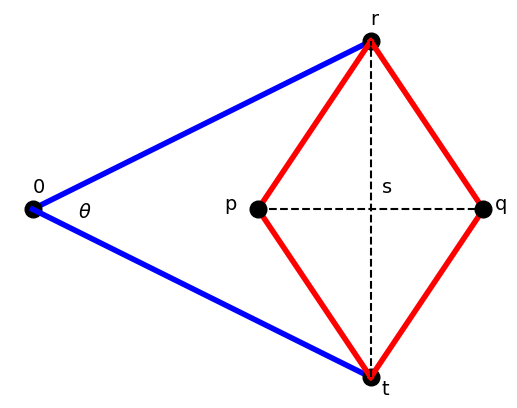

In [7]:
# illustrate Lemma PL1
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot([0,3], [0,1], 'b', linewidth=4)
plt.plot(0,0, 'ko', markersize=12)
plt.text(0.4,-.05,'$\\theta$', fontsize=14)
plt.text(3,1.1,'r', fontsize=14)
plt.plot(3,1, 'ko', markersize=12)
plt.text(0,.1,'0',fontsize=14)

plt.plot([0,3], [0,-1], 'b', linewidth=4)
plt.text(3.1,-1.1,'t', fontsize=14)
plt.plot(3,-1, 'ko', markersize=12)

plt.plot([3,2], [1,0], 'r', linewidth=4)
plt.text(1.7,0,'p', fontsize=14)
plt.plot([2,3], [0,-1], 'r', linewidth=4)
plt.plot(2,0, 'ko', markersize=12)

plt.plot([3,4], [-1,0], 'r', linewidth=4)
plt.text(4.1,0,'q', fontsize=14)
plt.plot([4,3], [0,1], 'r',  linewidth=4)
plt.plot(4,0, 'ko', markersize=12)

plt.plot([3,3],[-1,1],'k--')
plt.plot([2,4],[0,0],'k--')
plt.text(3.1,.1,'s', fontsize=14)

plt.axis('off');

\begin{myfig}\label{fig:PL1} Six links meeting at five joints. The two blue links have equal length. The four red links have equal length. The black dashed lines will help us analyze this construction.\end{myfig}

\begin{exercise}\label{ex:PL1} We note by symmetry that $p$ and $q$ are colinear. To reconcile this with our previous construction please show that $\Vert p\Vert\Vert q\Vert =k$ for some constant $k>0$, independent of the angle $\theta$.

(a) Use the Pythagorean Theorem to deduce that $\|s\|^2+\|r-s\|^2 = \|r\|^2$ and $\|p-r\|^2 = \|r-s\|^2 + \|p-s\|^2$.

(b) Deduce from part (a) that $\|r\|^2-\|p-r\|^2=(\|s\|-\|p-s\|)(\|s\|+\|p-s\|)$.

(c) Use the figure (and symmetry guaranteed by equality of red lengths) to deduce that $\|s\|-\|p-s\|=\|p\|$ and $\|s\|+\|p-s\|=\|q\|$.

(d) Substitute your findings from part (c) into part (b) and deduce that $\|p\|\|q\|=\|r\|^2-\|p-r\|^2$ and that this is indeed independent of the angle $\theta$.

\end{exercise}

Your solution here.

On combining these two results we arrive at the beautiful Peaucellier-Lipkin linkage

In [8]:
# illustrate the PL linkage
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

plt.ioff()
fig = plt.figure(' ')

qy = 0
qx = 4
blen = np.sqrt(10)
rlen = np.sqrt(2)

blink, = plt.plot([3,0,3], [1,0,-1], 'b', linewidth=4)
plt.plot(0,0, 'ko', markersize=8)

rlink, = plt.plot([3,2,3,2,3], [1,0,1,0,1], 'r', linewidth=4)

klink, = plt.plot([3,2,3,2], [1,0,1,0], 'ko', markersize=8)

plt.axis('equal')
plt.axis([-1, 5, -3, 3])
plt.axis('off')

qyS=widgets.FloatSlider(min=-2.2, max=2.2, step=0.1, value=0, description='$q_y$', orientation='vertical')

def update( qy=qyS ): 
    
    q = np.array([qx, qy])
    p = 8*q/(qx**2+qy**2)
    qang = np.arctan(qy/qx)
    alpha = np.arccos((np.linalg.norm((p+q)/2)-np.linalg.norm(p))/rlen)
    rx = p[0] + rlen*np.cos(alpha+qang)
    ry = p[1] + rlen*np.sin(alpha+qang)
    tx = p[0] + rlen*np.cos(alpha-qang)
    ty = p[1] - rlen*np.sin(alpha-qang)
    
    blink.set_data([rx, 0, tx],[ry, 0, ty])
    rlink.set_data([rx, p[0], tx, qx, rx], [ry, p[1], ty, qy, ry])
    klink.set_data([rx, p[0], tx, qx], [ry, p[1], ty, qy])
    plt.plot(p[0], p[1], 'ko', markersize = 8)
    plt.plot(q[0], q[1], 'ko', markersize = 8)
     
    fig.canvas.draw_idle()

widgets.interactive(update)
layoutS = widgets.Layout(display='flex', flex_flow='column', justify_content='center')
controls = widgets.VBox([qyS], layout = layoutS)
widgets.HBox([fig.canvas, controls])

\begin{myfig}\label{fig:PL} The Peaucellier-Lipkin Linkage. As you raise and lower the $q$ joint along a vertical line, the $p$ joint traces a segment of a circle. \end{myfig}

Next Section: [1.5 The Projective Line](1.5.ProjectiveLine.ipynb)